In [1]:
import pandas as pd
import numpy as np
import re
import torch

In [2]:
training_images_path = '/workspaces/Shopee-Price-Match-Guarantee/00_source_data/shopee-product-matching/train_images'
training_dataset =pd.read_csv('/workspaces/Shopee-Price-Match-Guarantee/00_source_data/shopee-product-matching/train.csv')
testing_dataset = pd.read_csv('/workspaces/Shopee-Price-Match-Guarantee/00_source_data/shopee-product-matching/test.csv')


In [3]:
training_dataset.head()

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069


In [4]:
testing_dataset.head()

,posting_id,image,image_phash,title
0,test_2255846744,0006c8e5462ae52167402bac1c2e916e.jpg,ecc292392dc7687a,Edufuntoys - CHARACTER PHONE ada lampu dan mus...
1,test_3588702337,0007585c4d0f932859339129f709bfdc.jpg,e9968f60d2699e2c,(Beli 1 Free Spatula) Masker Komedo | Blackhea...
2,test_4015706929,0008377d3662e83ef44e1881af38b879.jpg,ba81c17e3581cabe,READY Lemonilo Mie instant sehat kuah dan goreng


In [5]:
import nltk

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
# remove stop words 
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# remove punctuation
import string
punctuations = string.punctuation

# remove numbers
import re
def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result

# remove special characters
def remove_special_characters(text):
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern, '', text)
    return text

# remove extra spaces
def remove_extra_spaces(text):
    text = re.sub(' +', ' ', text)
    return text

def word_tokenize(text):
    text = text.split()
    return text

# remove stop words
def remove_stop_words(text):
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in stop_words]
    filtered_sentence = (" ").join(tokens_without_sw)
    return filtered_sentence

# remove all preprocessing
def remove_all_preprocessing(text):
    text = remove_numbers(text)
    text = remove_special_characters(text)
    text = remove_extra_spaces(text)
    text = remove_stop_words(text)
    return text

# apply all preprocessing
training_dataset['title'] = training_dataset['title'].apply(lambda x: remove_all_preprocessing(x))
testing_dataset['title'] = testing_dataset['title'].apply(lambda x: remove_all_preprocessing(x))




In [8]:
training_dataset

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,Double Tape M VHB mm x ORIGINAL DOUBLE FOAM TAPE,2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek Motif Acak Campur L...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc\xclair Latte ml,3648931069
...,...,...,...,...,...
34245,train_4028265689,fff1c07ceefc2c970a7964cfb81981c5.jpg,e3cd72389f248f21,Masker Bahan Kain Spunbond Non Woven gsm ply l...,3776555725
34246,train_769054909,fff401691371bdcb382a0d9075dfea6a.jpg,be86851f72e2853c,MamyPoko Pants Royal Soft S Popok Celana,2736479533
34247,train_614977732,fff421b78fa7284284724baf249f522e.jpg,ad27f0d08c0fcbf0,KHANZAACC Robot RES mm Subwoofer Bass Metal Wi...,4101248785
34248,train_3630949769,fff51b87916dbfb6d0f8faa01bee67b8.jpg,e3b13bd1d896c05c,Kaldu NON MSG HALAL Mama Kamu Ayam Kampung Sap...,1663538013


In [9]:
# get rid of \
training_dataset['title'] = training_dataset['title'].apply(lambda x: x.replace('\\', ''))
# lower case
training_dataset['title'] = training_dataset['title'].apply(lambda x: x.lower())

In [10]:
training_dataset.head(20)

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,paper bag victoria secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,double tape m vhb mm x original double foam tape,2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,maling tts canned pork luncheon meat gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,daster batik lengan pendek motif acak campur l...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,nescafe xcxclair latte ml,3648931069
5,train_2464356923,0013e7355ffc5ff8fb1ccad3e42d92fe.jpg,bbd097a7870f4a50,celana wanita bb kgharem wanita bisa cod,2660605217
6,train_1802986387,00144a49c56599d45354a1c28104c039.jpg,f815c9bb833ab4c8,jubah anak size thn,1835033137
7,train_1806152124,0014f61389cbaa687a58e38a97b6383d.jpg,eea7e1c0c04da33d,kulot plisket salur candy plisket wish kulot p...,1565741687
8,train_86570404,0019a3c6755a194cb2e2c12bfc63972e.jpg,ea9af4f483249972,[logu] tempelan kulkas magnet angka tempelan a...,2359912463
9,train_831680791,001be52b2beec40ddc1d2d7fc7a68f08.jpg,e1ce953d1a70618f,big sale sepatu pantofel kulit keren kerja kan...,2630990665


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
training_dataset['title_len'] = training_dataset['title'].str.len()


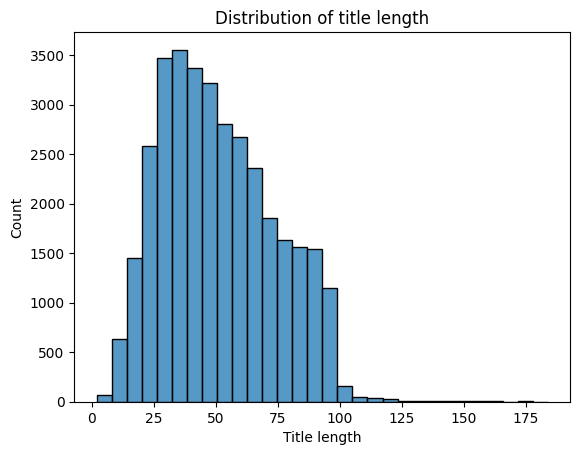

In [13]:
sns.histplot(data=training_dataset, x='title_len', bins=30)
# add title to plot
# add axis titles 
plt.xlabel('Title length')
plt.ylabel('Count')
plt.title('Distribution of title length')
plt.show()


In [14]:
training_dataset

,posting_id,image,image_phash,title,label_group,title_len
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,paper bag victoria secret,249114794,25
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,double tape m vhb mm x original double foam tape,2937985045,48
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,maling tts canned pork luncheon meat gr,2395904891,39
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,daster batik lengan pendek motif acak campur l...,4093212188,84
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,nescafe xcxclair latte ml,3648931069,25
...,...,...,...,...,...,...
34245,train_4028265689,fff1c07ceefc2c970a7964cfb81981c5.jpg,e3cd72389f248f21,masker bahan kain spunbond non woven gsm ply l...,3776555725,62
34246,train_769054909,fff401691371bdcb382a0d9075dfea6a.jpg,be86851f72e2853c,mamypoko pants royal soft s popok celana,2736479533,40
34247,train_614977732,fff421b78fa7284284724baf249f522e.jpg,ad27f0d08c0fcbf0,khanzaacc robot res mm subwoofer bass metal wi...,4101248785,57
34248,train_3630949769,fff51b87916dbfb6d0f8faa01bee67b8.jpg,e3b13bd1d896c05c,kaldu non msg halal mama kamu ayam kampung sap...,1663538013,80


In [15]:
from collections import Counter
import pytagcloud


pygame 2.3.0 (SDL 2.24.2, Python 3.11.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4745:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4745:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4745:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5233:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2660:(snd_pcm_open_noupdate) Unknown PCM default


In [16]:
text = ' '.join(training_dataset['title'].tolist())


In [20]:
word_counts = Counter(text.split())

In [24]:
word_freqs = [(word, count) for word, count in word_counts.items()]

In [22]:

word_freqs.sort(key=lambda x: x[1], reverse=True)

In [26]:
tags = pytagcloud.make_tags(word_freqs, maxsize=80)

In [27]:
pytagcloud.create_tag_image(tags, 'word_cloud.png', size=(800, 600))

In [29]:
from sentence_transformers import SentenceTransformer, util

/home/vscode/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [32]:
import torch
import torchvision.models as models

img_encoder = models.resnet50(pretrained=True)

/home/vscode/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/vscode/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /home/vscode/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 287MB/s]


In [33]:
# Freeze all the model parameters
for param in img_encoder.parameters():
    param.requires_grad = False

# Replace the last layer with an identity layer to get the image embeddings
img_encoder.fc = torch.nn.Identity()

In [34]:
text_encoder = SentenceTransformer('bert-base-nli-mean-tokens')

In [45]:
data_dir = '/workspaces/Shopee-Price-Match-Guarantee/00_source_data/shopee-product-matching/train_images'

In [41]:
data_transforms = transforms.Compose([
        transforms.Resize((256, 256)), # resize the images to 256x256
        transforms.ToTensor(), # convert the images to PyTorch tensors
        transforms.Normalize(mean=[0.485, 0.456, 0.406], # normalize the images
                             std=[0.229, 0.224, 0.225])
])


In [43]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

In [47]:

# Load the images from the folder
dataset = ImageFolder(root=data_dir, transform=data_transforms)

FileNotFoundError: Couldn't find any class folder in /workspaces/Shopee-Price-Match-Guarantee/00_source_data/shopee-product-matching/train_images.

In [38]:
from PIL import Image


In [39]:
img = Image.open('/workspaces/Shopee-Price-Match-Guarantee/00_source_data/shopee-product-matching/train_images')
img = transform(img)
img = img.unsqueeze(0)  # add batch dimension
img = img.to(device)  # move image to GPU if available


IsADirectoryError: [Errno 21] Is a directory: '/workspaces/Shopee-Price-Match-Guarantee/00_source_data/shopee-product-matching/train_images'

In [35]:
img_embeddings = []
for img_path in df['image']:
    img = # load and preprocess image
    img_embedding = img_encoder.encode(img)
    img_embeddings.append(img_embedding)


SyntaxError: invalid syntax (3137877218.py, line 3)

In [1]:
import torch.nn as nn
from transformers import BertModel

/home/vscode/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
bert_model_name = 'bert-base-uncased'
bert_model = BertModel.from_pretrained(bert_model_name)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [7]:
# Define pooling layer
pooling_layer = nn.MaxPool1d(training_dataset.shape[0])

# Define batch normalization layer
batch_norm_layer = nn.BatchNorm1d(768)

# Define linear layer
linear_layer = nn.Linear(768, 1)

# Define dropout layer
dropout_layer = nn.Dropout(0.1)


In [8]:
loss_function = nn.BCEWithLogitsLoss()

# Define optimizer
optimizer = torch.optim.Adam(linear_layer.parameters(), lr=0.001)


In [25]:

import torch.nn as nn
from transformers import BertModel
from transformers import BertTokenizer
import torch.nn as nn
import torch.nn.functional as F
from sentence_transformers import SentenceTransformer, util


In [13]:
training_dataset = pd.read_csv('/workspaces/Shopee-Price-Match-Guarantee/00_source_data/shopee-product-matching/train.csv')

In [14]:
training_dataset

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069
...,...,...,...,...,...
34245,train_4028265689,fff1c07ceefc2c970a7964cfb81981c5.jpg,e3cd72389f248f21,Masker Bahan Kain Spunbond Non Woven 75 gsm 3 ...,3776555725
34246,train_769054909,fff401691371bdcb382a0d9075dfea6a.jpg,be86851f72e2853c,MamyPoko Pants Royal Soft - S 70 - Popok Celana,2736479533
34247,train_614977732,fff421b78fa7284284724baf249f522e.jpg,ad27f0d08c0fcbf0,KHANZAACC Robot RE101S 1.2mm Subwoofer Bass Me...,4101248785
34248,train_3630949769,fff51b87916dbfb6d0f8faa01bee67b8.jpg,e3b13bd1d896c05c,"Kaldu NON MSG HALAL Mama Kamu Ayam Kampung , S...",1663538013


In [16]:
# hyperparameters
batch_size = 32
num_epochs = 5
learning_rate = 1e-5

In [27]:
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
maximum_length = 128
input_ids = []
attention_masks = []
labels = []



In [29]:
for i in range(len(training_dataset)):
    # Tokenize input text
    encoded_dict = tokenizer.encode_plus(
                        training_dataset['title'][i],                      # Title to encode
                        add_special_tokens = True,                  # Add '[CLS]' and '[SEP]'
                        max_length = maximum_length,                        # Pad or truncate all sentences
                        pad_to_max_length = True,
                        #return_attention_mask = True,               # Construct attn. masks
                        return_tensors = 'pt',                      # Return PyTorch tensors
                   )

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/home/vscode/.venv/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [30]:
input_ids.append(encoded_dict['input_ids'])


In [31]:
# And its attention mask (simply differentiates padding from non-padding).
attention_masks.append(encoded_dict['attention_mask'])


In [33]:
  # Add the label to the list so that we can convert it to a tensor later.
labels.append(training_dataset['label_group'][i])

In [34]:
# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

In [35]:
# Load pre-trained BERT model
bert_model_name = 'bert-base-uncased'
bert_model = BertModel.from_pretrained(bert_model_name)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [36]:
# Define pooling layer
pooling_layer = nn.MaxPool1d(input_ids.shape[0])

# Define batch normalization layer
batch_norm_layer = nn.BatchNorm1d(768)

# Define linear layer
linear_layer = nn.Linear(768, 1)

# Define dropout layer
dropout_layer = nn.Dropout(0.1)

In [37]:
loss_function = nn.BCEWithLogitsLoss()

# Define optimizer
optimizer = torch.optim.Adam(linear_layer.parameters(), lr=0.001)

In [38]:
num_epochs = 10

In [41]:
for epoch in range(num_epochs):
    for i in range(len(training_dataset)):
        # Get input data
        input_id = input_ids[i].unsqueeze(0)
        attention_mask = attention_masks[i].unsqueeze(0)
        label = labels[i].unsqueeze(0)
        
        # Forward pass
        outputs = bert_model(input_ids=input_id, attention_mask=attention_mask)
        pooled_output = outputs[1]
        pooled_output = dropout_layer(pooled_output)
        pooled_output = pooled_output.unsqueeze(0)  # add a dimension for batch
        pooled_output = batch_norm_layer(pooled_output)
        pooled_output = pooling_layer(pooled_output)
        pooled_output = pooled_output.squeeze(1)
        logits = linear_layer(pooled_output)
        loss = loss_function(logits, label)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
train_embeddings = model.encode(training_dataset['title'])


RuntimeError: running_mean should contain 1 elements not 768

In [19]:
# Define pooling layer
pooling_layer = nn.MaxPool1d(training_dataset.shape[0])

# Define batch normalization layer
batch_norm_layer = nn.BatchNorm1d(768)

# Define linear layer
linear_layer = nn.Linear(768, 1)

In [20]:
# dropout layer
dropout_layer = nn.Dropout(0.1)


In [21]:
# Define loss function
loss_function = nn.BCEWithLogitsLoss()

# Define optimizer
optimizer = torch.optim.Adam(linear_layer.parameters(), lr=0.001)


In [43]:
import pandas as pd
import torch
from torch.utils.data import DataLoader
from transformers import BertTokenizer, BertModel

In [44]:
training_dataset = pd.read_csv('/workspaces/Shopee-Price-Match-Guarantee/00_source_data/shopee-product-matching/train.csv')

In [45]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [46]:
batch_size = 8
num_epochs = 3
learning_rate = 2e-5
number_of_top_scores_k = 5

In [48]:
input_ids = []
attention_masks = []
for title in training_dataset['title']:
    encoded_dict = tokenizer.encode_plus(title,
                                         add_special_tokens=True,
                                         max_length=64,
                                         pad_to_max_length=True,
                                         return_attention_mask=True,
                                         return_tensors='pt')
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/home/vscode/.venv/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [49]:
input_ids = torch.cat(input_ids, dim=0)

In [50]:
attention_masks = torch.cat(attention_masks, dim=0)

# Create dataset and dataloader
dataset = torch.utils.data.TensorDataset(input_ids, attention_masks)
dataloader = DataLoader(dataset, batch_size=batch_size)

In [51]:
optimizer = torch.optim.Adam(bert_model.parameters(), lr=learning_rate)
loss_function = torch.nn.CrossEntropyLoss()

In [56]:
num_labels = 5


In [59]:
from transformers import BertModel
import torch

# Define BERT model
model = BertModel.from_pretrained('bert-base-uncased')

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
loss_function = torch.nn.CrossEntropyLoss()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [60]:
for epoch in range(num_epochs):
    running_loss = 0.0
    model.train() # set model to training mode
    for i, data in enumerate(train_dataloader, 0):
        input_ids, attention_masks, labels = data
        optimizer.zero_grad()
        
        # Forward pass
        outputs = bert_model(input_ids=input_ids,
                             attention_mask=attention_masks)
        pooled_output = outputs[1]
        pooled_output = torch.nn.functional.dropout(pooled_output, p=0.2)
        pooled_output = torch.nn.functional.batch_norm(pooled_output)
        pooled_output = torch.nn.functional.avg_pool1d(pooled_output.unsqueeze(1), kernel_size=64).squeeze(1)
        logits = torch.nn.Linear(768, 2)(pooled_output)
        
        # Compute loss and backward pass
        loss = loss_function(logits, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
    # Validation loop
    model.eval() # set model to evaluation mode
    with torch.no_grad():
        for i, data in enumerate(val_dataloader, 0):
            input_ids, attention_masks, labels = data
            
            # Forward pass
            outputs = bert_model(input_ids=input_ids,
                                 attention_mask=attention_masks)
            pooled_output = outputs[1]
            pooled_output = torch.nn.functional.dropout(pooled_output, p=0.2)
            pooled_output = torch.nn.functional.batch_norm(pooled_output)
            pooled_output = torch.nn.functional.avg_pool1d(pooled_output.unsqueeze(1), kernel_size=64).squeeze(1)
            logits = torch.nn.Linear(768, 2)(pooled_output)
            
            # Compute loss and accuracy
            val_loss = loss_function(logits, labels)
            val_running_loss += val_loss.item()
            
            _, predicted = torch.max(logits, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
    # Print stats for this epoch
    print('Epoch [%d], Loss: %.4f, Val Loss: %.4f, Accuracy: %.2f%%' %
          (epoch + 1, running_loss / len(train_dataloader), val_running_loss / len(val_dataloader), 100 * correct / total))
          
    model.train() # set model back to training mode


NameError: name 'train_dataloader' is not defined

/home/vscode/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-04-13 20:42:20.001788: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-13 20:42:22.580692: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-13 20:42:22.581622: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-13 20:42:27.176850: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-13 20:42:49.012780: W tensorflo

NameError: name 'np' is not defined

In [3]:
import torch
import pandas as pd
from transformers import BertModel, BertTokenizer

/home/vscode/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
training_dataset = pd.read_csv('/workspaces/Shopee-Price-Match-Guarantee/00_source_data/shopee-product-matching/train.csv')

In [5]:
model = BertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [6]:
# Tokenize the input data
input_ids = []
attention_masks = []

In [8]:

for title in training_dataset['title']:
    encoded_dict = tokenizer.encode_plus(title,
                                         add_special_tokens=True,
                                         max_length=64,
                                         pad_to_max_length=True,
                                         return_attention_mask=True,
                                         return_tensors='pt')
    
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/home/vscode/.venv/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [9]:
batch_size = 32

dataset = torch.utils.data.TensorDataset(input_ids, attention_masks)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size)

In [10]:
# Set up the optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)
loss_function = torch.nn.CrossEntropyLoss()


In [11]:
num_epochs = 5

model.train()


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [17]:
# training dataset columns
# posting_id, image, image_phash, title, label_group, matches

# show label_group 
training_dataset['label_group'].value_counts()

label_group
994676122     51
1163569239    51
1141798720    51
159351600     51
562358068     51
              ..
1349674444     2
2359590024     2
1528129430     2
3156068330     2
53836859       2
Name: count, Length: 11014, dtype: int64

In [15]:
num_labels = len(set(labels))

NameError: name 'labels' is not defined

In [16]:
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(dataloader, 0):
        input_ids, attention_masks = data
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(input_ids=input_ids,
                        attention_mask=attention_masks)
        pooled_output = outputs[1]
        pooled_output = torch.nn.functional.dropout(pooled_output, p=0.2)
        pooled_output = torch.nn.functional.batch_norm(pooled_output, running_mean=None, running_var=None, training=True)
        pooled_output = torch.nn.functional.avg_pool1d(pooled_output.unsqueeze(1), kernel_size=64).squeeze(1)
        logits = torch.nn.Linear(768, num_labels)(pooled_output)

        # Compute loss and backward pass
        loss = loss_function(logits, torch.zeros(batch_size, dtype=torch.long))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        # Print running loss every 100 batches
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

NameError: name 'num_labels' is not defined

In [18]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
import torch.nn as nn
import torch.nn.functional as F


In [19]:
training_dataset = pd.read_csv('/workspaces/Shopee-Price-Match-Guarantee/00_source_data/shopee-product-matching/train.csv')

In [20]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [21]:
num_tokens = 512
output_features = 128

# Define the dropout probability and batch normalization momentum
dropout_prob = 0.2
batch_norm_momentum = 0.1

In [22]:
class BERTPoolModel(nn.Module):
    def __init__(self):
        super(BERTPoolModel, self).__init__()
        self.bert = bert_model
        self.dropout = nn.Dropout(p=dropout_prob)
        self.batch_norm = nn.BatchNorm1d(num_tokens, momentum=batch_norm_momentum)
        self.pooling = nn.AdaptiveAvgPool1d(output_features)
        self.linear = nn.Linear(output_features, 1)

In [23]:
def forward(self, input_ids, attention_mask):
        bert_output = self.bert(input_ids, attention_mask=attention_mask)
        pooled_output = bert_output[1]
        pooled_output = self.dropout(pooled_output)
        pooled_output = self.batch_norm(pooled_output)
        pooled_output = pooled_output.unsqueeze(1)
        pooled_output = self.pooling(pooled_output)
        pooled_output = pooled_output.squeeze(1)
        linear_output = self.linear(pooled_output)
        return linear_output

In [24]:
# Define the device to use for training the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model and send it to the device
model = BERTPoolModel().to(device)


In [25]:
batch_size = 8
learning_rate = 1e-5


In [26]:
loss_function = nn.BCEWithLogitsLoss()

In [27]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [28]:
num_epochs = 10

In [32]:
import torch
import pandas as pd
from transformers import BertModel, BertTokenizer

In [33]:
training_dataset = pd.read_csv('/workspaces/Shopee-Price-Match-Guarantee/00_source_data/shopee-product-matching/train.csv')

In [34]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [35]:
# Define batch size and number of epochs
batch_size = 16
num_epochs = 5

In [37]:
# Convert the titles to input IDs and attention masks
input_ids = []
attention_masks = []
for title in training_dataset['title']:
    encoded_dict = tokenizer.encode_plus(
                        title,                      # Title to encode
                        add_special_tokens = True,  # Add '[CLS]' and '[SEP]'
                        max_length = 64,            # Pad/truncate to 64 tokens
                        pad_to_max_length = True,
                        return_attention_mask = True,# Generate attention mask
                        return_tensors = 'pt',      # PyTorch tensors format
                   )
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/home/vscode/.venv/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [38]:
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.zeros(len(input_ids), dtype=torch.long)  # No labels

In [39]:
dataset = torch.utils.data.TensorDataset(input_ids, attention_masks, labels)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size)

In [40]:
optimizer = torch.optim.Adam(bert_model.parameters(), lr=2e-5)
loss_function = torch.nn.CrossEntropyLoss()

In [41]:
bert_model.train()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [47]:
def create_dataloader(training_dataset):
    input_ids = []
    attention_masks = []
    for title in training_dataset['title']:
        encoded = tokenizer.encode_plus(title, add_special_tokens=True, max_length=64, padding='max_length', return_attention_mask=True, return_tensors='pt')
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)
    dataset = torch.utils.data.TensorDataset(input_ids, attention_masks)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size)
    return dataloader

In [52]:
from torch.utils.data import DataLoader


In [53]:
train_dataloader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

In [54]:
loss_function = torch.nn.CrossEntropyLoss()


In [55]:
optimizer = torch.optim.AdamW(bert_model.parameters(), lr=learning_rate)

In [61]:
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # Get the inputs
        titles, _ = data
        titles = titles.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        bert_output = bert_model(titles)
        pooled_output = bert_output[1]
        logits = torch.nn.Linear(768, 1)(pooled_output)
        
        # Compute loss and backward pass
        loss = loss_function(logits, torch.zeros(batch_size, dtype=torch.long))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        # Print running loss every 100 batches
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0


KeyError: 33375

In [59]:
# column names of training dataset
training_dataset.columns

Index(['posting_id', 'image', 'image_phash', 'title', 'label_group'], dtype='object')

In [60]:
import pandas as pd
unique_labels = training_dataset['label_group'].unique()
print(unique_labels)

[ 249114794 2937985045 2395904891 ... 1313560418  763032672   53836859]


In [62]:
import torch
from transformers import BertModel

In [63]:
class BertClassifier(torch.nn.Module):
    def __init__(self, num_labels):
        super(BertClassifier, self).__init__()
        self.bert_model = BertModel.from_pretrained('bert-base-uncased')
        self.dropout = torch.nn.Dropout(0.2)
        self.batch_norm = torch.nn.BatchNorm1d(self.bert_model.config.hidden_size)
        self.avg_pool = torch.nn.AdaptiveAvgPool1d(1)
        self.linear = torch.nn.Linear(self.bert_model.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask):
        bert_output = self.bert_model(input_ids, attention_mask=attention_mask)[0]
        x = self.dropout(bert_output)
        x = self.batch_norm(x)
        x = x.transpose(1, 2)
        x = self.avg_pool(x).squeeze(-1)
        x = self.linear(x)
        return x

In [64]:
from torch.optim import Adam


In [65]:
# Define optimizer
optimizer = Adam(model.parameters(), lr=learning_rate)

# Define loss function
loss_function = torch.nn.CrossEntropyLoss()

In [66]:
num_epochs = 10
batch_size = 64
learning_rate = 1e-5

In [67]:
train_dataloader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

In [68]:
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
loss_function = torch.nn.BCEWithLogitsLoss()

In [69]:
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # Get the inputs
        input_ids, attention_masks, labels = data
        input_ids = input_ids.to(device)
        attention_masks = attention_masks.to(device)
        labels = labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        bert_output = bert_model(input_ids, attention_mask=attention_masks)
        pooled_output = bert_output[1]
        pooled_output = torch.nn.functional.dropout(pooled_output, p=0.2)
        pooled_output = torch.nn.BatchNorm1d(pooled_output.shape[1])(pooled_output)
        pooled_output = torch.nn.functional.avg_pool1d(pooled_output.unsqueeze(1), kernel_size=64).squeeze(1)
        logits = torch.nn.Linear(768, 1)(pooled_output)
        
        # Compute loss and backward pass
        loss = loss_function(logits, labels.float().unsqueeze(1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        # Print running loss every 100 batches
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

KeyError: 15199

In [70]:
from transformers import BertTokenizer, BertModel
import torch
import pandas as pd


In [72]:
training_dataset 

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069
...,...,...,...,...,...
34245,train_4028265689,fff1c07ceefc2c970a7964cfb81981c5.jpg,e3cd72389f248f21,Masker Bahan Kain Spunbond Non Woven 75 gsm 3 ...,3776555725
34246,train_769054909,fff401691371bdcb382a0d9075dfea6a.jpg,be86851f72e2853c,MamyPoko Pants Royal Soft - S 70 - Popok Celana,2736479533
34247,train_614977732,fff421b78fa7284284724baf249f522e.jpg,ad27f0d08c0fcbf0,KHANZAACC Robot RE101S 1.2mm Subwoofer Bass Me...,4101248785
34248,train_3630949769,fff51b87916dbfb6d0f8faa01bee67b8.jpg,e3b13bd1d896c05c,"Kaldu NON MSG HALAL Mama Kamu Ayam Kampung , S...",1663538013


In [73]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [74]:
model = BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
embeddings = []
for title in training_dataset['title']:
    input_ids = torch.tensor(tokenizer.encode(title, add_special_tokens=True, max_length=64, padding='max_length')).unsqueeze(0)
    with torch.no_grad():
        last_hidden_states = model(input_ids)[0]
    embeddings.append(last_hidden_states[0][0].numpy())
    

In [ ]:

# Compute the embeddings for each product title
embeddings = []
for title in shopee_df['title']:
    tokens = tokenizer.encode(title, add_special_tokens=True)
    tensor = torch.tensor([tokens])
    outputs, _ = model(tensor)
    embedding = outputs.detach().numpy()[0]
    embeddings.append(embedding)

# Compute the similarity between two product titles
index_1 = 0  # index of the first product title
index_2 = 1  # index of the second product title
cosine_sim = torch.nn.functional.cosine_similarity(torch.tensor([embeddings[index_1]]), torch.tensor([embeddings[index_2]]))

print(cosine_sim.item())  # Output: similarity between the two product titles


In [17]:
from sentence_transformers import SentenceTransformer, util
import torch.nn as nn
import torch.nn.functional as F
import torch

/home/vscode/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
training_df = pd.DataFrame.from_dict(training_dataset)

In [18]:
model_name = 'sentence-transformers/distiluse-base-multilingual-cased-v2'

In [20]:
number_of_top_scores_k = 5


In [21]:
bert_model = SentenceTransformer(model_name)

In [22]:
pooling_layer = nn.AdaptiveMaxPool1d(1)
batch_norm_layer = nn.BatchNorm1d(bert_model.get_sentence_embedding_dimension())

In [23]:
# Define the forward pass function
def forward_pass(input_ids, attention_mask):
    embeddings = bert_model(input_ids, attention_mask)
    embeddings = embeddings.unsqueeze(-1)
    embeddings = pooling_layer(embeddings)
    embeddings = embeddings.squeeze(-1)
    embeddings = batch_norm_layer(embeddings)
    return embeddings

In [27]:
train_embeddings = []
for i in range(len(training_dataset)):
    title = training_dataset['title'][i]
    if not isinstance(title, str):
        title = str(title)
    input_ids = torch.tensor(bert_model.tokenize(title)).unsqueeze(0)
    attention_mask = torch.ones_like(input_ids)
    embeddings = forward_pass(input_ids, attention_mask)
    train_embeddings.append(embeddings.detach().numpy())

train_embeddings = np.vstack(train_embeddings)

RuntimeError: Could not infer dtype of dict

In [28]:
import pandas as pd
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
from sentence_transformers import SentenceTransformer, util
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import torch.nn.functional as F



In [31]:
training_dataset.head(5)

,posting_id,image,image_phash,title,label_group,title_len
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,paper bag victoria secret,249114794,25
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,double tape m vhb mm x original double foam tape,2937985045,48
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,maling tts canned pork luncheon meat gr,2395904891,39
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,daster batik lengan pendek motif acak campur l...,4093212188,84
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,nescafe xcxclair latte ml,3648931069,25


In [32]:
# Encode the target variable as one-hot vectors
le = LabelEncoder()
ohe = OneHotEncoder()

In [ ]:
# columns of training_dataset 


# Encode the target variable